In [1]:
import numpy as np
import pylab as pl
from IPython.display import display, clear_output
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(333)

In [3]:
random_1 = np.random.randn(2,100)

In [4]:
random_1.shape

(2, 100)

In [5]:
random_2 = np.random.randn(2,100) + 2

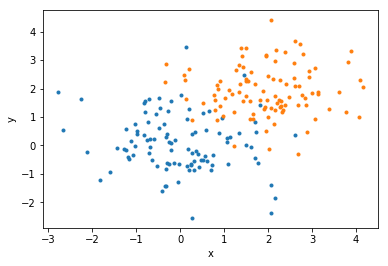

In [6]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.xlabel('x')
pl.ylabel('y');

# 1. chose the number of clusters 
nclusters = 2

In [7]:
random_stack = np.hstack([random_1, random_2])

# 2. set an initial guess

In [8]:
centers = np.array([[0.,-1.], [0,-2]]) 

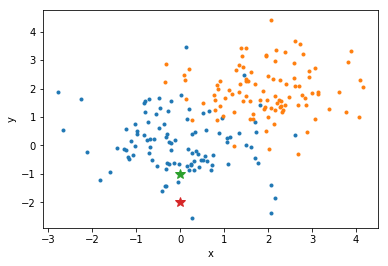

In [9]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');

In [10]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

# 3. check for each point which center is closer

In [11]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])


# 4. calculate new centers

In [12]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers)
print ("new center\n", newc)

('old center\n', array([[ 0., -1.],
       [ 0., -2.]]))
('new center\n', array([[ 0.96972306,  1.06522176],
       [ 1.02400655, -2.10176012]]))


# Show animation

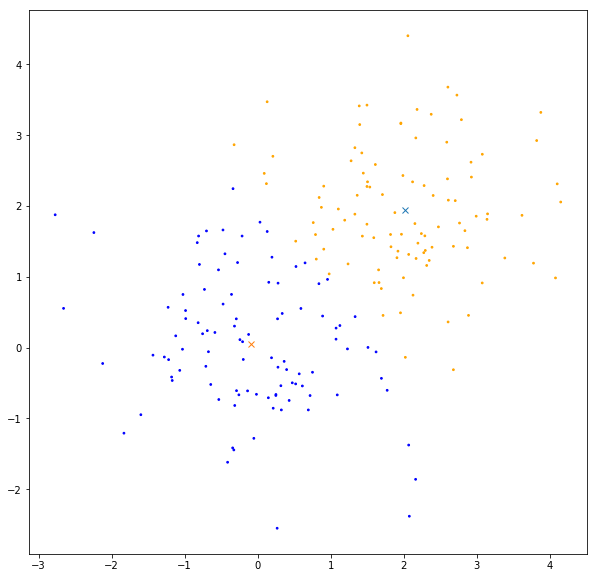

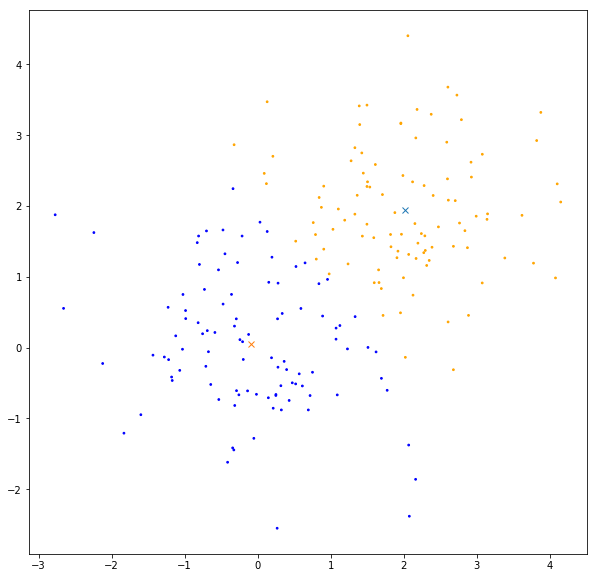

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
Spoints = np.hstack([random_1, random_2])
Sclasses = np.hstack([cl1, cl2])
ax.scatter(Spoints[0, :], Spoints[1, :], c=Sclasses, s=4)
ax.plot(centers[1,0], centers[1,1],'x')
ax.plot(centers[-1,1], centers[0,-1],'x')
display(fig)

for i in xrange(20):
    time.sleep(0.3)
    clear_output(wait=True)
    cl1 = distmetric(random_1[0], random_1[1], newc[0]) \
            < distmetric(random_1[0], random_1[1], newc[1])
    cl2 = distmetric(random_2[0], random_2[1], newc[0])\
            < distmetric(random_2[0], random_2[1], newc[1])
    Sclasses = np.hstack([cl1, cl2])
    ax.clear()
    colors = np.array([('orange' if c else 'blue') for c in Sclasses])
    ax.scatter(Spoints[0, :], Spoints[1, :], c=colors, s=3)
    ax.plot(newc[0,0], newc[0,1],'x', linewidth=4)
    ax.plot(newc[1,0], newc[1,1],'x', linewidth=4)
    newc = np.array(
        [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1),
         np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    display(fig)